<a href="https://colab.research.google.com/github/RenanScarabelli/analise_dados_pandas/blob/main/Pandas_aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Também posso fazer apenas o Upload do Arquivo para que eu possa trabalhar com ele, porém o mesmo será apagado após eu sair.
import pandas as pd


In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Datasets/Salvador.xlsx")

In [ ]:
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [ ]:
#juntando os arquivos, vamos concatenar todos eles
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.sample(5) #Busca uma quantidade determinada de exemplos na minha planilha

,Cidade,Data,Vendas,LojaID,Qtde
46,Recife,2019-01-01,239.17,981,8
155,Natal,2019-01-02,237.81,1036,3
121,Aracaju,2018-01-01,162.07,1520,3
47,Natal,2018-03-13,521.00,854,3
182,Natal,2019-01-02,6.60,1037,2


In [ ]:
#Verificar o tipo de dado em cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Como Alterar o tipo de dados de uma coluna. Vamos modificar o Loja ID para o Tipo Object
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

# Tratando Valores Faltantes

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo Valores Nulos pela média da Coluna 
#Caso eu desejasse substituir por um valor determinado, no caso 0 colocaria o seguinte df["Vendas"].fillna(0, inplace=True)
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
1,Natal,2018-11-25,563.00,853,2
225,Natal,2019-01-02,36.23,1035,1
50,Salvador,2019-01-01,44.87,1036,3
146,Natal,2019-01-02,149.88,1037,1
129,Salvador,2019-03-02,125.66,1037,1
53,Fortaleza,2019-01-01,11.48,1002,4
93,Recife,2019-01-01,17.45,980,6
121,Natal,2019-01-02,100.70,1037,3
123,Aracaju,2018-01-01,115.19,1523,6
15,Fortaleza,2019-01-01,195.05,1002,2


In [ ]:
#Conferir qual foi a média de vendas
df["Vendas"].mean()

122.61180089485458

In [ ]:
#Apagar linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna. Apaguei todos os valores Nulos na coluna Vendas
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em TODAS as colunas
df.dropna(how="all", inplace=True)

# Criando novas colunas

In [ ]:
#Posso criar uma nova coluna para colocar a receita total de vendas. Multiplicando as Vendas pela quantidade
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
#Criando uma nova coluna com a média de vendas, Coluna Receita dividada por Vendas
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornarno a menor receita
df["Receita"].min()

3.34

In [ ]:
#Retornarno a maior receita
df["Receita"].max()

3544.0

In [ ]:
#para saber qual foi a loja que vendeu a maior receita e a menor receita
df.nlargest(3, "Receita")  #Retornará as 3 linhas das maiores receitas até o momento

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#para saber qual foi a loja que vendeu a maior receita e a menor receita
df.nsmallest(3, "Receita")  #Retornará as 3 linhas das maiores receitas até o momento

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Retornar a soma da receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Retornar e orgdenar a coluna de receita pelas 10 maiores receitas
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [ ]:
#Transformando a coluna de data em tipo inteiro - Será transformada para inteiro para exemplificar como muitas colunas vem errado
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.dtypes #Verificando o tipo de cada dado

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Transformando corretamente a coluna data para data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes


Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupamento por ano - Neste método ele irá buscar apenas o ano na data e somar
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
71,Aracaju,2018-01-01,228.27,1523,6,1369.62,6.0,2018
110,Salvador,2019-03-02,185.93,1036,3,557.79,3.0,2019
161,Natal,2019-01-02,5.80,1036,1,5.80,1.0,2019
212,Salvador,2019-01-02,50.73,1037,3,152.19,3.0,2019
16,Recife,2019-01-01,19.95,980,8,159.60,8.0,2019


In [ ]:
#Extraindo mês e o dia de uma data de venda - Preciso informar antes do = qual será o nome da nova coluna, após o = eu informo de onde será tirado o dado para preencher.
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
191,Natal,2019-01-02,173.59,1034,2,347.18,2.0,2019,1,2
48,Salvador,2019-01-01,127.28,1035,2,254.56,2.0,2019,1,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,6.0,2019,3,2
51,Natal,2018-01-21,859.00,852,4,3436.00,4.0,2018,1,21
18,Salvador,2019-01-01,242.31,1035,1,242.31,1.0,2019,1,1
39,Salvador,2019-01-01,165.95,1036,3,497.85,3.0,2019,1,1
34,Fortaleza,2019-01-01,3.10,1003,5,15.50,5.0,2019,1,1
69,Recife,2019-01-01,38.83,981,1,38.83,1.0,2019,1,1
60,Natal,2018-05-02,534.00,852,3,1602.00,3.0,2018,5,2
162,Natal,2019-01-02,23.08,1036,2,46.16,2.0,2019,1,2


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença entre dias
#Como não temos duas colunas de datas, iremos pegar a data da venda e subtrair da data da venda mais antiga.
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
147,Salvador,2019-01-02,34.50,1035,1,34.50,1.0,2019,1,2,366 days
114,Natal,2019-01-02,25.52,1034,1,25.52,1.0,2019,1,2,366 days
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,2019,3,2,425 days
28,Aracaju,2018-01-01,114.93,1520,5,574.65,5.0,2018,1,1,0 days
15,Salvador,2019-01-01,20.15,1036,3,60.45,3.0,2019,1,1,365 days
110,Natal,2019-01-02,185.93,1036,3,557.79,3.0,2019,1,2,366 days
108,Aracaju,2018-01-01,31.94,1520,8,255.52,8.0,2018,1,1,0 days
67,Natal,2019-02-14,379.00,852,2,758.00,2.0,2019,2,14,409 days
52,Natal,2018-04-27,778.00,854,4,3112.00,4.0,2018,4,27,116 days
161,Natal,2019-01-02,5.80,1036,1,5.80,1.0,2019,1,2,366 days


In [ ]:
#Calculando o Trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
82,Recife,2019-01-01,29.55,981,6,177.30,6.0,2019,1,1,365 days,1
183,Salvador,2019-01-02,120.23,1037,2,240.46,2.0,2019,1,2,366 days,1
62,Fortaleza,2019-01-01,106.21,1005,6,637.26,6.0,2019,1,1,365 days,1
161,Natal,2019-01-02,5.80,1036,1,5.80,1.0,2019,1,2,366 days,1
86,Fortaleza,2019-01-01,42.11,1004,3,126.33,3.0,2019,1,1,365 days,1
43,Natal,2019-04-01,538.00,853,3,1614.00,3.0,2019,4,1,455 days,2
4,Natal,2019-03-09,699.00,853,3,2097.00,3.0,2019,3,9,432 days,1
49,Fortaleza,2019-01-01,183.33,1002,6,1099.98,6.0,2019,1,1,365 days,1
150,Salvador,2019-01-02,11.13,1035,2,22.26,2.0,2019,1,2,366 days,1
12,Salvador,2019-01-01,125.05,1034,3,375.15,3.0,2019,1,1,365 days,1


In [ ]:
#Filtrando as vendas de 2019 realizadas no mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
122,Recife,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days,1
135,Recife,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days,1
108,Recife,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
121,Recife,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2.0,2019,3,2,425 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2.0,2019,3,2,425 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,4.0,2019,3,18,441 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1


In [ ]:
#Somando as vendas de março de 2019
vendas_marco_19["Vendas"].sum()

19321.23

# Visualização de Dados

In [ ]:
#Método Value_counts - Fará uma contagem - No método abaixo ele irá colocar o total de vendas por loja ID
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

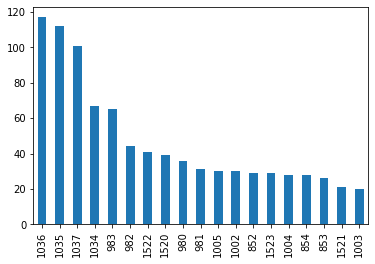

In [ ]:
#Método Value_counts - Fará uma contagem - Agora vamos passar o comando plot para criar um gráfico
df["LojaID"].value_counts(ascending=False).plot.bar()

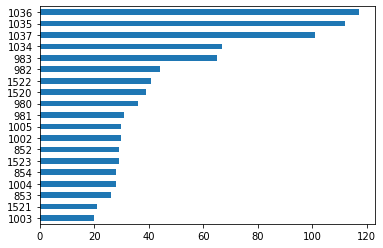

In [ ]:
#grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

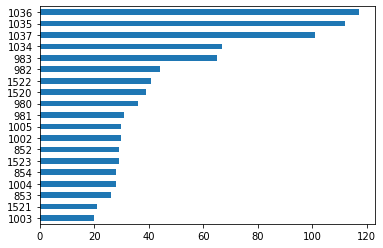

In [ ]:
#grafico de barras horizontais - Para retirar a linha de texto em cima do gráfico vamos apenas colocar um ";" ao fim do código
df["LojaID"].value_counts(ascending=True).plot.barh();

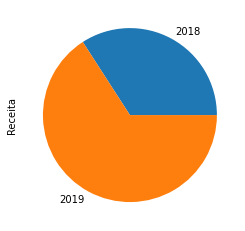

In [ ]:
#Gráfico de Pizza demonstrando as receitas por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

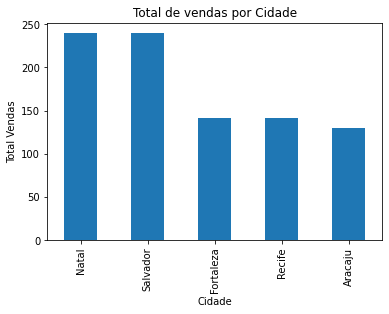

In [ ]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

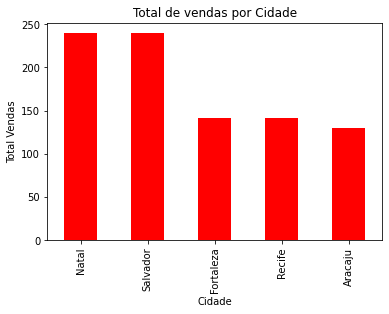

In [ ]:
#Alterando a cor do gráfico - Passar a cor que desejamos após o título
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterar o estilo dos gráficos do Matplotlib
# Pagina do Matplot para buscar modelos https://matplotlib.org/stable/plot_types/index
plt.style.use("ggplot")

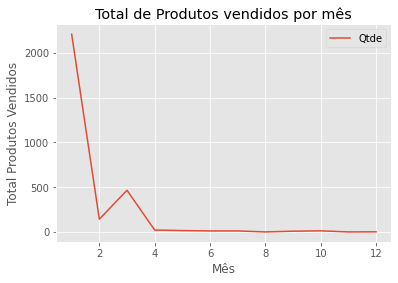

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [ ]:
#Somando as vendas por Mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionar apenas as vendas de 2019 criando uma variável
df_2019 = df[df["Ano_Venda"] == 2019]

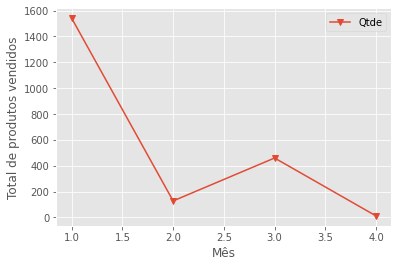

In [ ]:
#Total de produtos vendidos por mês - o "v" é um marcador, pode ser utilizado um asterisco ou algum outro.
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v");
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos");
plt.legend();

In [ ]:
#Conferir os dados do gráfico, sem o grafico, apenas na tabela
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

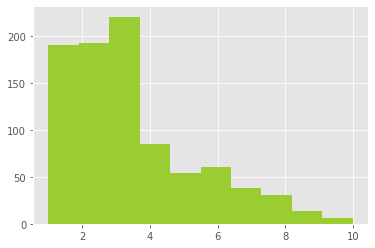

In [ ]:
#Criar um Histograma
plt.hist(df["Qtde"], color="yellowgreen");
#Site para cores do Matploit = https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

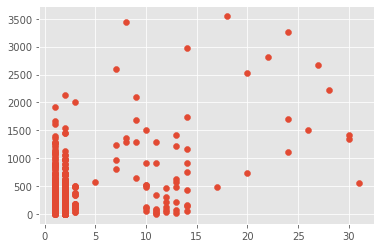

In [ ]:
#Colocando um gráfico de dispersão.
plt.scatter(x=df_2019["dia_venda"], y =df_2019["Receita"]);

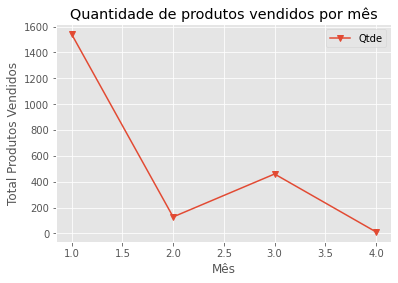

In [ ]:
#Salvando gráfico em PNG
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("Grafico QTDE x MES.PNG")  #Ordem para salvar o arquigo em PNG